In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# y = mx + b
# m = slope, b = y-intercept
x = np.linspace(-10, 10, 100) 
m = 0.5
y = m * x + 2

Text(0.5, 1.0, 'Linear function')

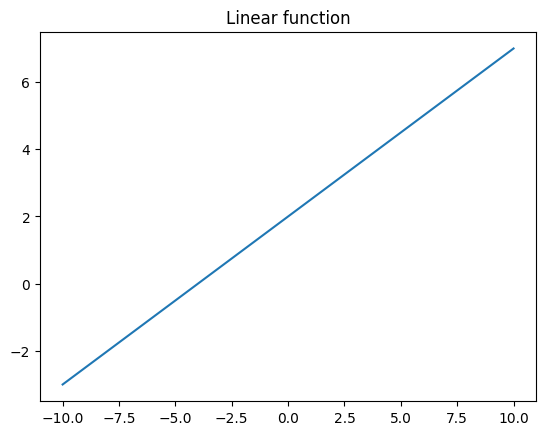

In [4]:
plt.plot(x, y)
plt.title('Linear function')

In [5]:
# Quadratic Eqn
# y = (x + 2)(5x - 9)
# y = 5x ** 2 + x - 18 -> ax^2 + bx + c
# a = 5, b = 1, c = -18
x = np.linspace(-10, 10, 100)

a = 5 * x ** 2
b = x
c = -18

y = a + b + c



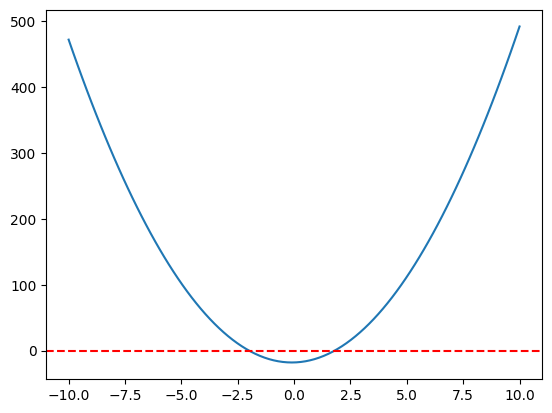

In [6]:
plt.plot(x, y)
plt.axhline(y=0, color='r', linestyle='--')

In [7]:
# f(x) = 5x^ 2 + x - 18

def f(x):
    return 5 * x ** 2 + x - 18


In [8]:
f(3)

30

In [9]:
# dy/dx = (f(x + h) - f(x)) / h

h = 0.0000001
x = 0
(f(x+h) - f(x)) / h

# as h -> 0, x -> 1 [true value of deravitive of f(x) at x = 0]

1.0000005090660125

In [10]:
import sys
sys.path.append("../core")

import random
from special import Special

In [11]:
def f(x):
    return (x - 3) ** 2

x = Special(0.0, requires_grad=True)

for step in range(100):
    loss = f(x)
    loss.backward()
    lr = 0.1
    x.data -= lr * x.grad
    x.grad = 0.0
    print(f'Step = {step} | x = {x.data:.4f} | loss = {loss.data:.4f}')

Step = 0 | x = 0.6000 | loss = 9.0000
Step = 1 | x = 1.0800 | loss = 5.7600
Step = 2 | x = 1.4640 | loss = 3.6864
Step = 3 | x = 1.7712 | loss = 2.3593
Step = 4 | x = 2.0170 | loss = 1.5099
Step = 5 | x = 2.2136 | loss = 0.9664
Step = 6 | x = 2.3709 | loss = 0.6185
Step = 7 | x = 2.4967 | loss = 0.3958
Step = 8 | x = 2.5973 | loss = 0.2533
Step = 9 | x = 2.6779 | loss = 0.1621
Step = 10 | x = 2.7423 | loss = 0.1038
Step = 11 | x = 2.7938 | loss = 0.0664
Step = 12 | x = 2.8351 | loss = 0.0425
Step = 13 | x = 2.8681 | loss = 0.0272
Step = 14 | x = 2.8944 | loss = 0.0174
Step = 15 | x = 2.9156 | loss = 0.0111
Step = 16 | x = 2.9324 | loss = 0.0071
Step = 17 | x = 2.9460 | loss = 0.0046
Step = 18 | x = 2.9568 | loss = 0.0029
Step = 19 | x = 2.9654 | loss = 0.0019
Step = 20 | x = 2.9723 | loss = 0.0012
Step = 21 | x = 2.9779 | loss = 0.0008
Step = 22 | x = 2.9823 | loss = 0.0005
Step = 23 | x = 2.9858 | loss = 0.0003
Step = 24 | x = 2.9887 | loss = 0.0002
Step = 25 | x = 2.9909 | loss = 0.0

#### Logistic Regression

In [12]:
data = (
    (0.0, 0),
    (1.0, 0),
    (2.0, 1),
    (3.0, 1),
)

# small random initialization
w = Special(random.uniform(-0.1, 0.1), requires_grad=True)
b = Special(random.uniform(-0.1, 0.1), requires_grad=True)

for epoch in range(500):
    total_loss = 0.0

    for x_val, y_true in data:

        x = Special(x_val)

        # forward
        logits = w * x + b
        y_pred = logits.sigmoid()
        # loss
        loss = -(y_true * y_pred.log() + (1 - y_true) * (1 - y_pred).log())
        total_loss += loss.data

        # backward
        loss.backward()

        # gradient descent
        lr = 0.5
        w.data -= lr * w.grad
        b.data -= lr * b.grad

        # zero grad
        w.grad = 0.0
        b.grad = 0.0
    print(f'Epoch: {epoch:>4} | Loss: {total_loss:.4f}')

Epoch:    0 | Loss: 2.6359
Epoch:    1 | Loss: 2.2186
Epoch:    2 | Loss: 1.9662
Epoch:    3 | Loss: 1.7545
Epoch:    4 | Loss: 1.5856
Epoch:    5 | Loss: 1.4501
Epoch:    6 | Loss: 1.3392
Epoch:    7 | Loss: 1.2468
Epoch:    8 | Loss: 1.1685
Epoch:    9 | Loss: 1.1012
Epoch:   10 | Loss: 1.0425
Epoch:   11 | Loss: 0.9909
Epoch:   12 | Loss: 0.9450
Epoch:   13 | Loss: 0.9038
Epoch:   14 | Loss: 0.8667
Epoch:   15 | Loss: 0.8329
Epoch:   16 | Loss: 0.8021
Epoch:   17 | Loss: 0.7738
Epoch:   18 | Loss: 0.7477
Epoch:   19 | Loss: 0.7236
Epoch:   20 | Loss: 0.7012
Epoch:   21 | Loss: 0.6802
Epoch:   22 | Loss: 0.6607
Epoch:   23 | Loss: 0.6423
Epoch:   24 | Loss: 0.6251
Epoch:   25 | Loss: 0.6089
Epoch:   26 | Loss: 0.5935
Epoch:   27 | Loss: 0.5791
Epoch:   28 | Loss: 0.5653
Epoch:   29 | Loss: 0.5523
Epoch:   30 | Loss: 0.5399
Epoch:   31 | Loss: 0.5281
Epoch:   32 | Loss: 0.5168
Epoch:   33 | Loss: 0.5061
Epoch:   34 | Loss: 0.4958
Epoch:   35 | Loss: 0.4859
Epoch:   36 | Loss: 0.4765
E

In [ ]:
data = (
    (0.0, 0),
    (1.0, 1),
    (2.0, 1),
    (3.0, 1),
)

w1 = Special(random.uniform(-0.1, 0.1), requires_grad=True)
w2 = Special(random.uniform(-0.1, 0.1), requires_grad=True)
b1 = Special(random.uniform(-0.1, 0.1), requires_grad=True)
b2 = Special(random.uniform(-0.1, 0.1), requires_grad=True)

epochs = 500
lr = 0.5

for epoch in range(epochs):
    total_loss = 0

    for x_val, y_true in data:
        x_val = Special(x_val)

        # forward
        hidden = (w1 * x_val + b1).tanh()
        logits = w2 * hidden + b2

        y_pred = logits.sigmoid()

        # loss
        loss = -(y_true * y_pred.log() + (1 - y_true) * (1 - y_pred).log())
        total_loss += loss.data

        # backprop
        loss.backward()

        for param in [w1, b1, w2, b2]:
            param.data -= lr * param.grad
            param.grad = 0.0


    print(f'Epoch: {epoch:>3} | Loss: {total_loss:.4f}')


Epoch:   0 | Loss: 2.8065
Epoch:   1 | Loss: 2.4840
Epoch:   2 | Loss: 2.3057
Epoch:   3 | Loss: 2.1685
Epoch:   4 | Loss: 2.0233
Epoch:   5 | Loss: 1.8284
Epoch:   6 | Loss: 1.5790
Epoch:   7 | Loss: 1.3038
Epoch:   8 | Loss: 1.0425
Epoch:   9 | Loss: 0.8232
Epoch:  10 | Loss: 0.6555
Epoch:  11 | Loss: 0.5332
Epoch:  12 | Loss: 0.4441
Epoch:  13 | Loss: 0.3780
Epoch:  14 | Loss: 0.3276
Epoch:  15 | Loss: 0.2883
Epoch:  16 | Loss: 0.2569
Epoch:  17 | Loss: 0.2314
Epoch:  18 | Loss: 0.2103
Epoch:  19 | Loss: 0.1926
Epoch:  20 | Loss: 0.1775
Epoch:  21 | Loss: 0.1645
Epoch:  22 | Loss: 0.1532
Epoch:  23 | Loss: 0.1434
Epoch:  24 | Loss: 0.1346
Epoch:  25 | Loss: 0.1269
Epoch:  26 | Loss: 0.1200
Epoch:  27 | Loss: 0.1137
Epoch:  28 | Loss: 0.1081
Epoch:  29 | Loss: 0.1030
Epoch:  30 | Loss: 0.0983
Epoch:  31 | Loss: 0.0941
Epoch:  32 | Loss: 0.0901
Epoch:  33 | Loss: 0.0865
Epoch:  34 | Loss: 0.0832
Epoch:  35 | Loss: 0.0801
Epoch:  36 | Loss: 0.0772
Epoch:  37 | Loss: 0.0745
Epoch:  38 |